In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Database connection parameters
host = "mtas01.vlba.uni-oldenburg.de"          # e.g., "localhost" or "127.0.0.1"
port = "5432"               # Default PostgreSQL port
database = "bicourse_db_35"  # Database name
user = "bicourse_user_35"      # PostgreSQL username
password = "fVe9mkY291"  # PostgreSQL password


# Connect to the database and fetch data
try:
    # Establish connection
    connection = psycopg2.connect(
        host=host,
        port=port,
        database=database,
        user=user,
        password=password
    )
    
    # Create a cursor object
    cursor = connection.cursor()
    
    # SQL query to fetch the required data
    query = """
    SELECT yearly_income, 
           marital_status, 
           total_children, 
           gender, 
           english_education, 
           house_owner_flag, 
           number_cars_owned
    FROM dim_customer; -- Replace with your actual table name
    """
    
    # Execute the query and fetch results
    cursor.execute(query)
    data = cursor.fetchall()
    
    # Load data into a DataFrame
    columns = ['income', 'marital_status', 'total_children', 'gender', 'education', 'house_owner', 'number_cars_owned']
    customer_data = pd.DataFrame(data, columns=columns)
    
    print("Data fetched successfully!")
    print(customer_data.head())  # Preview the data

except Exception as error:
    print("Error while fetching data:", error)

finally:
    if connection:
        cursor.close()
        connection.close()

Data fetched successfully!
    income marital_status  total_children gender  education  house_owner  \
0  90000.0              M               2      M  Bachelors            1   
1  60000.0              S               3      M  Bachelors            0   
2  60000.0              M               3      M  Bachelors            1   
3  70000.0              S               0      F  Bachelors            0   
4  80000.0              S               5      F  Bachelors            1   

   number_cars_owned  
0                  0  
1                  1  
2                  1  
3                  1  
4                  4  


In [2]:
customer_data.head()

,income,marital_status,total_children,gender,education,house_owner,number_cars_owned
0,90000.0,M,2,M,Bachelors,1,0
1,60000.0,S,3,M,Bachelors,0,1
2,60000.0,M,3,M,Bachelors,1,1
3,70000.0,S,0,F,Bachelors,0,1
4,80000.0,S,5,F,Bachelors,1,4


In [3]:
customer_data.describe()

,income,total_children,house_owner,number_cars_owned
count,18484.000000,18484.000000,18484.000000,18484.000000
mean,57305.777970,1.844352,0.676369,1.502705
std,32285.841703,1.612408,0.467874,1.138394
min,10000.000000,0.000000,0.000000,0.000000
25%,30000.000000,0.000000,0.000000,1.000000
50%,60000.000000,2.000000,1.000000,2.000000
75%,70000.000000,3.000000,1.000000,2.000000
max,170000.000000,5.000000,1.000000,4.000000


In [5]:
customer_data.education.value_counts().index

Index(['Bachelors', 'Partial College', 'High School', 'Graduate Degree',
       'Partial High School'],
      dtype='object', name='education')

In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   income             18484 non-null  float64
 1   marital_status     18484 non-null  object 
 2   total_children     18484 non-null  int64  
 3   gender             18484 non-null  object 
 4   education          18484 non-null  object 
 5   house_owner        18484 non-null  int64  
 6   number_cars_owned  18484 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 1011.0+ KB


In [9]:
customer_data.marital_status.value_counts().index

Index(['M', 'S'], dtype='object', name='marital_status')

In [10]:
def classify_profile(row):
    if row['income'] > 75000:
        return "High Earners"
    elif 30000 <= row['income'] <= 75000 and row['marital_status'] == 'M' and row['total_children'] > 0:
        return "Middle Class Families"
    elif 30000 <= row['income'] <= 75000 and row['marital_status'] == 'S' and row['total_children'] == 0 and \
         row['education'] in ['Bachelors', 'Graduate Degree']:
        return "Young Professionals"
    elif row['income'] < 30000:
        return "Low Income"
    else:
        return "Other"

# Define profiles
customer_data['Profile'] = customer_data.apply(lambda row: classify_profile(row), axis=1)


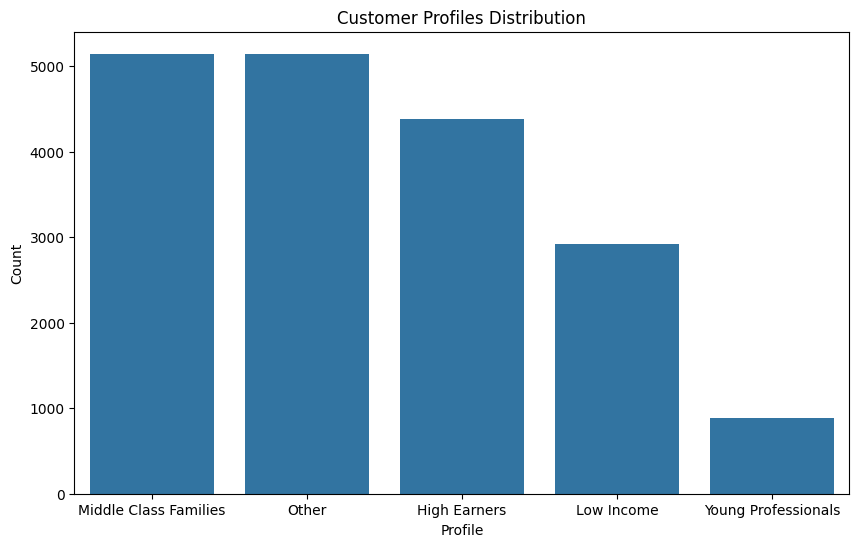

In [11]:
# Visualizations for business questions
# 1. Marketing Campaign Optimization
profile_counts = customer_data['Profile'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=profile_counts.index, y=profile_counts.values)
plt.title("Customer Profiles Distribution")
plt.xlabel("Profile")
plt.ylabel("Count")
plt.show()